## Bit Slicing, Encoding and Decoding

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Important Functions

def getNthSlice(data, n):
    # gets only the nth bit
    return np.bitwise_and(data, 1 << n)

def clearNthSlice(data, n):
    # Clear nth Bit
    return np.bitwise_and(data, ~(1<<n))

def plotAllSlices(data):
    # Plots all bits as separate images
    plt.figure(figsize=(15,15))
    for i in range(0, 7+1):        
        plt.subplot(4,4,i+1), plt.title(str(i)+"th bit"), plt.imshow(getNthSlice(data, i), cmap= "gray")
    plt.show()

In [3]:
imgfile = '../../db/cameraman_original.png'  #Image
secretMessageImg = '../../db/gt.tif'   #Secret Message

img_original = cv2.imread(imgfile, 0)
height,width = img_original.shape[:2]
        

#Making Secret_message Binary.
secret_message = cv2.imread(secretMessageImg, 0)
secret_message = cv2.resize(secret_message, (width, height))
secret_message = secret_message > 128
secret_message = secret_message.astype('uint8')


N = 0 #Choosing in what bit the secret message will be.   0 Is the least significant bit






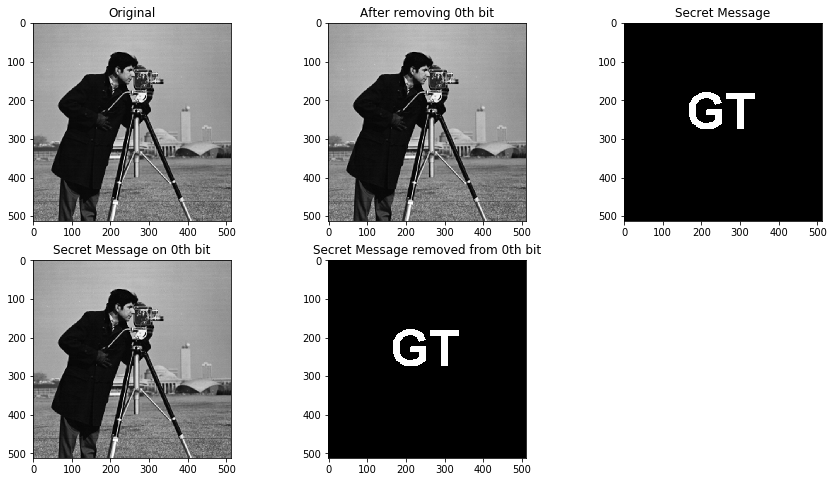

In [4]:
plt.figure(figsize=(15,8))
plt.subplot(231), plt.title("Original"), plt.imshow(img_original, cmap = "gray")

#Image after removing the Nth Slice (Clearing the Nth bit)
img_pre_message = clearNthSlice(img_original, N)
plt.subplot(232), plt.title("After removing "+ str(N)+"th bit"), plt.imshow(img_pre_message, cmap = "gray")

plt.subplot(233), plt.title("Secret Message"), plt.imshow(secret_message, cmap = "gray")

#Image after inserting secret Message
img_post_message = img_pre_message + secret_message*(2**N)
plt.subplot(234), plt.title("Secret Message on "+ str(N)+"th bit"), plt.imshow(img_post_message, cmap = "gray")
                                                                               
decryptedImg = getNthSlice(img_post_message, N)                                                                               
plt.subplot(235), plt.title("Secret Message removed from "+ str(N)  +"th bit"), plt.imshow(decryptedImg, cmap = "gray")
plt.show()

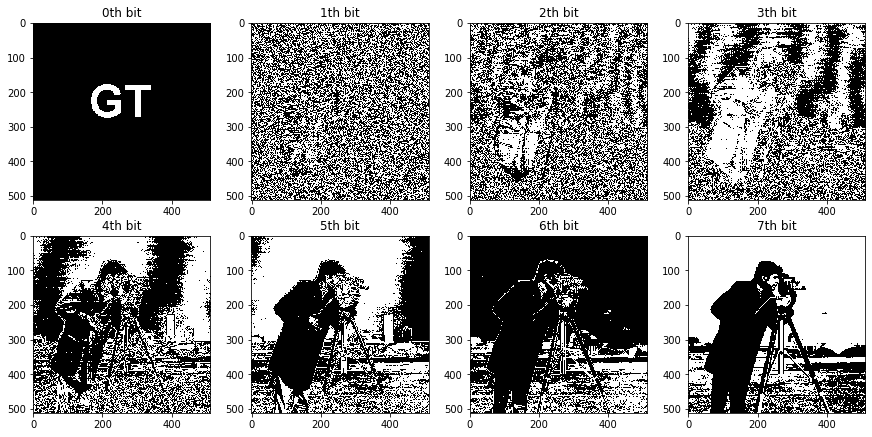

In [5]:
plotAllSlices(img_post_message)